Importing the libraries

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
#loading the dataset
stock_data= pd.read_csv('/content/Nvidia_stock_data.csv')

In [37]:
stock_data.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [38]:
stock_data.shape

(6637, 6)

In [39]:
stock_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [40]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB


In [41]:
# statistical description of data
stock_data.describe()

,Close,High,Low,Open,Volume
count,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,10.091263,10.279293,9.885371,10.091765,5.952182e+08
std,26.686641,27.192558,26.140134,26.706411,4.297521e+08
min,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,149.416245,153.115916,147.806407,153.015919,9.230856e+09


In [42]:
#splitting data into features and target
x= stock_data.drop(columns=['Date','Close'],axis=1)
y= stock_data['Close']

In [43]:
print(x)
print(y)

            High         Low        Open      Volume
0       0.044775    0.035581    0.040119  2714688000
1       0.042029    0.037612    0.040597   510480000
2       0.042865    0.037731    0.042029   343200000
3       0.039403    0.036298    0.038447   244368000
4       0.038447    0.037850    0.038209   227520000
...          ...         ...         ...         ...
6632  142.389999  139.539993  142.190002   167120800
6633  144.000000  138.830002  142.169998   231397900
6634  143.270004  141.509995  142.509995   153986200
6635  145.000000  141.940002  143.190002   185114500
6636  144.289993  141.529999  142.690002   155372400

[6637 rows x 4 columns]
0         0.037612
1         0.041552
2         0.038328
3         0.038209
4         0.038089
           ...    
6632    141.919998
6633    139.990005
6634    141.720001
6635    142.630005
6636    143.960007
Name: Close, Length: 6637, dtype: float64


In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [45]:
#splitting into training and testing

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [46]:
print(x.shape,x_train.shape,x_test.shape)

(6637, 4) (5309, 4) (1328, 4)


In [47]:
x_train_std= scaler.fit_transform(x_train)
x_test_std= scaler.transform(x_test)


In [48]:
#loading model
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
model.fit(x_train_std,y_train)

LinearRegression()

In [51]:
x_train_prediction= model.predict(x_train_std)
mean_training_error= mean_absolute_error(y_train,x_train_prediction)
print('Error in training= ',mean_training_error*100)


Error in training=  8.505266783535951


In [52]:
x_test_prediction= model.predict(x_test_std)
mean_testing_error= mean_absolute_error(y_test,x_test_prediction)
print('Error in testing= ' ,mean_testing_error*100)


Error in testing=  8.83169475868911


Making a predictive system

In [63]:
input_data= [0.04477530714919751,0.0355814614532041,0.0401187785903406,2714688000]
real_close=[0.0376117005944252]
input_data_as_array= np.asarray(input_data)
input_data_reshape= input_data_as_array.reshape(1,-1)
std_data= scaler.transform(input_data_reshape)
prediction= model.predict(std_data)
print(prediction)
performance= np,abs(prediction- real_close)
print(performance) # close to zero means better prediction

[0.02943821]
(<module 'numpy' from '/usr/local/lib/python3.11/dist-packages/numpy/__init__.py'>, array([0.00817349]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
#plotting graph for different values

import matplotlib.pyplot as plt


In [55]:
open_price= stock_data['Open']
close_price= stock_data['Close']
highest_price= stock_data['High']
lowest_price= stock_data['Low']
no_of_shares_sell= stock_data['Volume']
date= stock_data['Date']

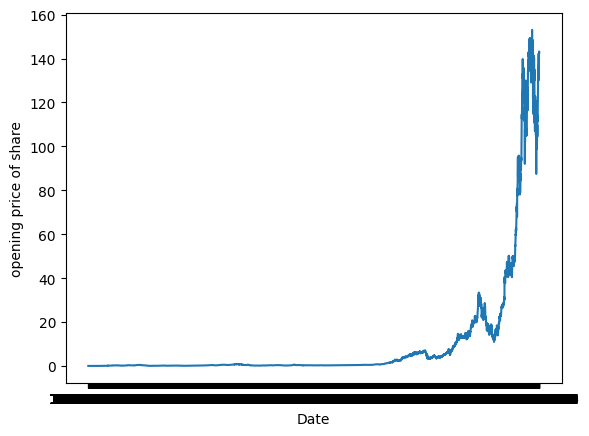

In [56]:
plt.plot(date,open_price)
plt.xlabel('Date')
plt.ylabel('opening price of share')
plt.show()

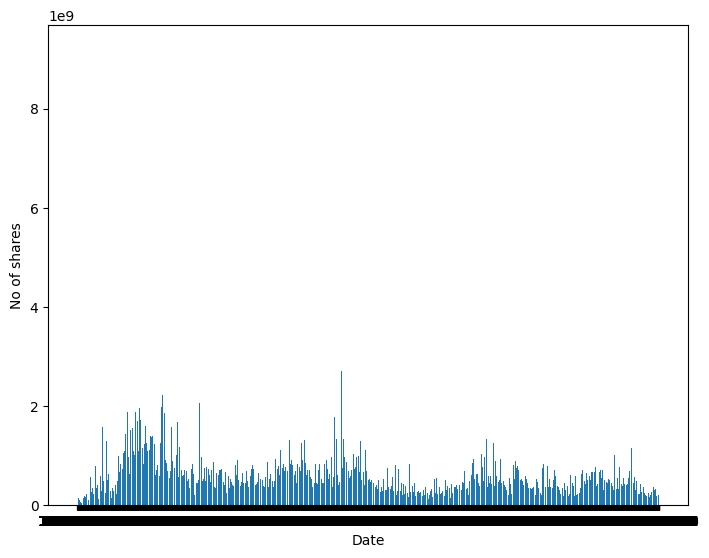

In [57]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.bar(date,no_of_shares_sell)
plt.xlabel('Date')
plt.ylabel('No of shares')
plt.show()

Saving the trained model

In [58]:
import pickle

In [59]:
filename= 'nvidia_model.sav'

In [60]:
pickle.dump(model,open(filename,'wb'))

In [61]:
#loading the saved model
loaded_model= pickle.load(open('nvidia_model.sav','rb'))

In [64]:
input_data= [0.04477530714919751,0.0355814614532041,0.0401187785903406,2714688000]
real_close=[0.0376117005944252]
input_data_as_array= np.asarray(input_data)
input_data_reshape= input_data_as_array.reshape(1,-1)
std_data= scaler.transform(input_data_reshape)
prediction= loaded_model.predict(std_data)
print(prediction)

[0.02943821]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
